# Optimizer

## Data Preparation

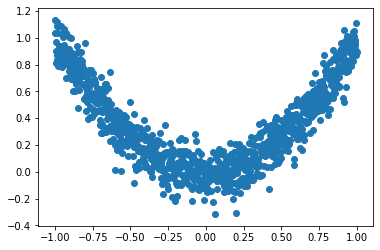

In [1]:
import torch
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt

# hyperparameters
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(x.size()))

plt.scatter(x.numpy(), y.numpy())
plt.show()

## Batched Data

In [2]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE, 
    shuffle=True
)

## Build Network

In [3]:
net_SGD = torch.nn.Sequential(
    torch.nn.Linear(1, 20), 
    torch.nn.ReLU(),
    torch.nn.Linear(20, 1)
)

net_Momentum = torch.nn.Sequential(
    torch.nn.Linear(1, 20), 
    torch.nn.ReLU(),
    torch.nn.Linear(20, 1)
)

net_RMSprop = torch.nn.Sequential(
    torch.nn.Linear(1, 20), 
    torch.nn.ReLU(),
    torch.nn.Linear(20, 1)
)

net_Adam = torch.nn.Sequential(
    torch.nn.Linear(1, 20), 
    torch.nn.ReLU(),
    torch.nn.Linear(20, 1)
)

nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

## Build Optimizer

In [4]:
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))

optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

## Trainning

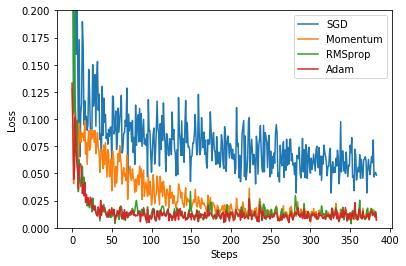

In [5]:
loss_fn = torch.nn.MSELoss()
loss_history = [[], [], [], []]

for epoch in range(EPOCH):
    # mini-batch
    for step, (batch_x, batch_y) in enumerate(loader):
        batch_x = Variable(batch_x)
        batch_y = Variable(batch_y)
        
        # training
        for net, opt, l in zip(nets, optimizers, loss_history):
            prediction = net(batch_x)
            loss = loss_fn(prediction, batch_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l.append(loss.data.numpy())
            

labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l in enumerate(loss_history):
    plt.plot(l, label=labels[i])

plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()